# Обучение без учителя

## Кластеризация

В задачах обучения без учителя у нас есть только входные данные x(i) без меток, и мы хотим, чтобы алгоритм нашел некоторую структуру в данных.

Алгоритм кластеризации, такой как алгоритм k-средних, пытается сгруппировать данные в k «кластеров», которые имеют некоторое сходство.

Примеры: анализ социальных сетей, организация компьютерных кластеров и анализ астрономических данных.


K-Means
Алгоритм кластеризации K-Means использует итеративное уточнение для получения окончательного результата. Входными данными алгоритма являются количество кластеров К и набор данных. Набор данных представляет собой набор функций для каждой точки данных. Алгоритмы начинаются с начальных оценок для К-центроидов, которые могут быть либо сгенерированы случайным образом, либо случайным образом выбраны из набора данных. Затем алгоритм повторяется между двумя шагами:

1. Шаг присвоения данных:

Каждый центроид определяет один из кластеров. На этом этапе каждой точке данных присваивается ее ближайший центр тяжести на основе квадрата евклидова расстояния. Более формально, если ci представляет собой набор центроидов в наборе C, то каждая точка данных x назначается кластеру на основе

$$\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$$

2. Шаг обновления Centroid:

На этом этапе центроиды пересчитываются. Это делается путем получения среднего значения всех точек данных, назначенных кластеру этого центроида.

$$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$


c:\git\Витте\dscience\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-3117.526189575374


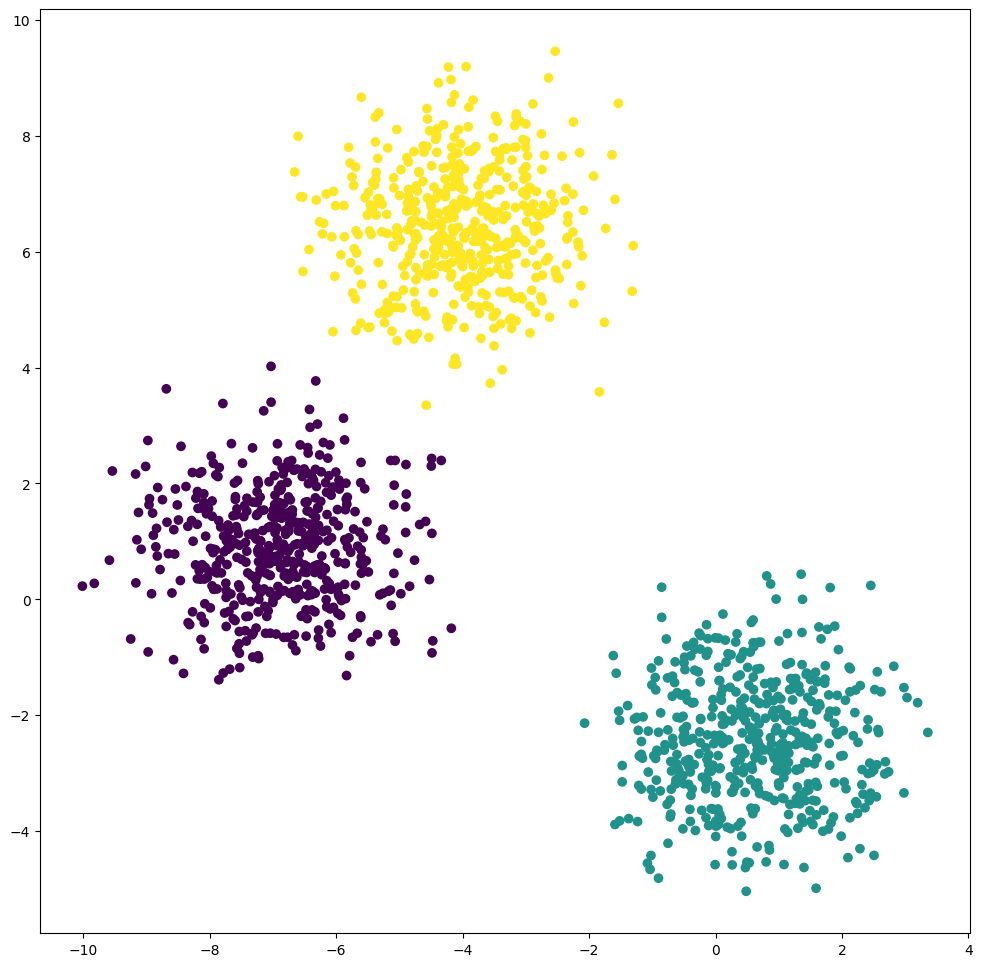

In [10]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 1760
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
print(kmeans.score(X))
plt.show()

### Как выбрать количество кластеров

Метод Elbow


[[1, -37601.12336144224],
 [2, -12838.655661844501],
 [3, -3117.526189575374],
 [4, -2776.8570512043534],
 [5, -2407.299216561818],
 [6, -2113.4475332961474],
 [7, -1872.8112598342152],
 [8, -2023.811731834283],
 [9, -1398.0944419344394]]

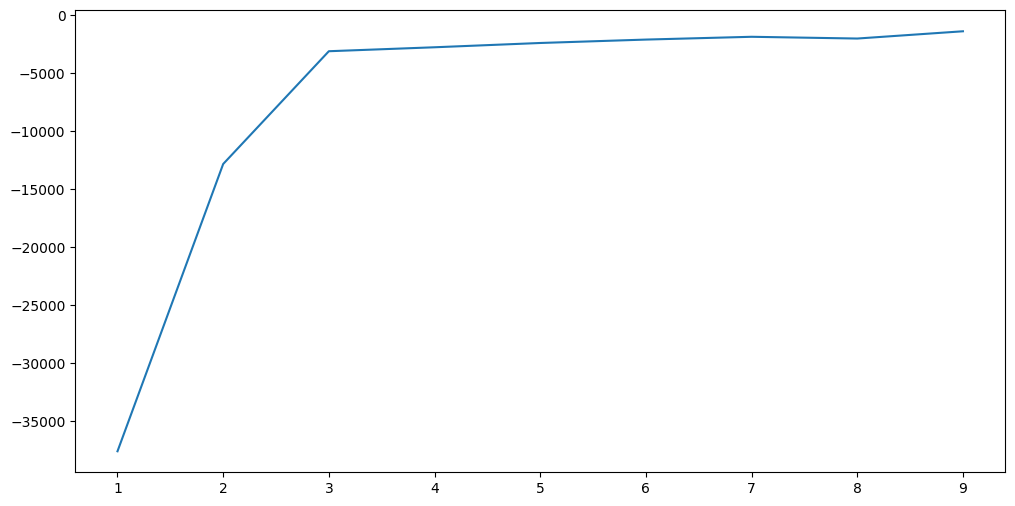

In [12]:
scores = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, n_init="auto")
    kmeans.fit_predict(X)
    scores.append([i,kmeans.score(X)])
display(scores)
import pandas as pd
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(pd.DataFrame(np.array(scores))[0],pd.DataFrame(np.array(scores))[1])
plt.show()

### Иерархическая (агломеративная) кластеризация

Данные: Информация об атрибутах:

1. длина чашелистика в см
2. ширина чашелистика в см
3. длина лепестка в см
4. ширина лепестка в см
5. класс:
   -- Ирис Сетоса
   -- Ирис разноцветный
   -- Ирис Вирджиния

- Изначально каждая точка сама является кластером.
- Два ближайших кластера неоднократно объединяются в один.
- Остановка, когда останется только один кластер.


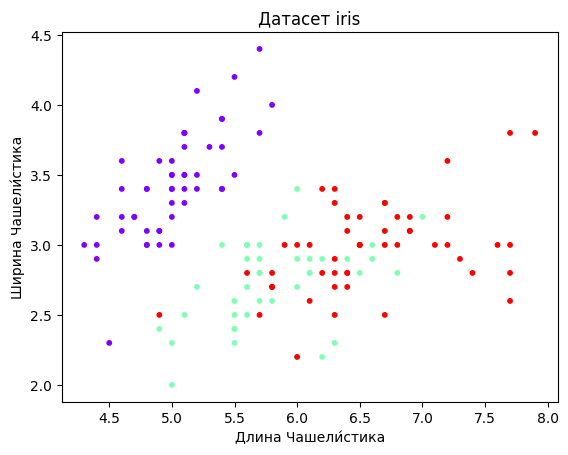

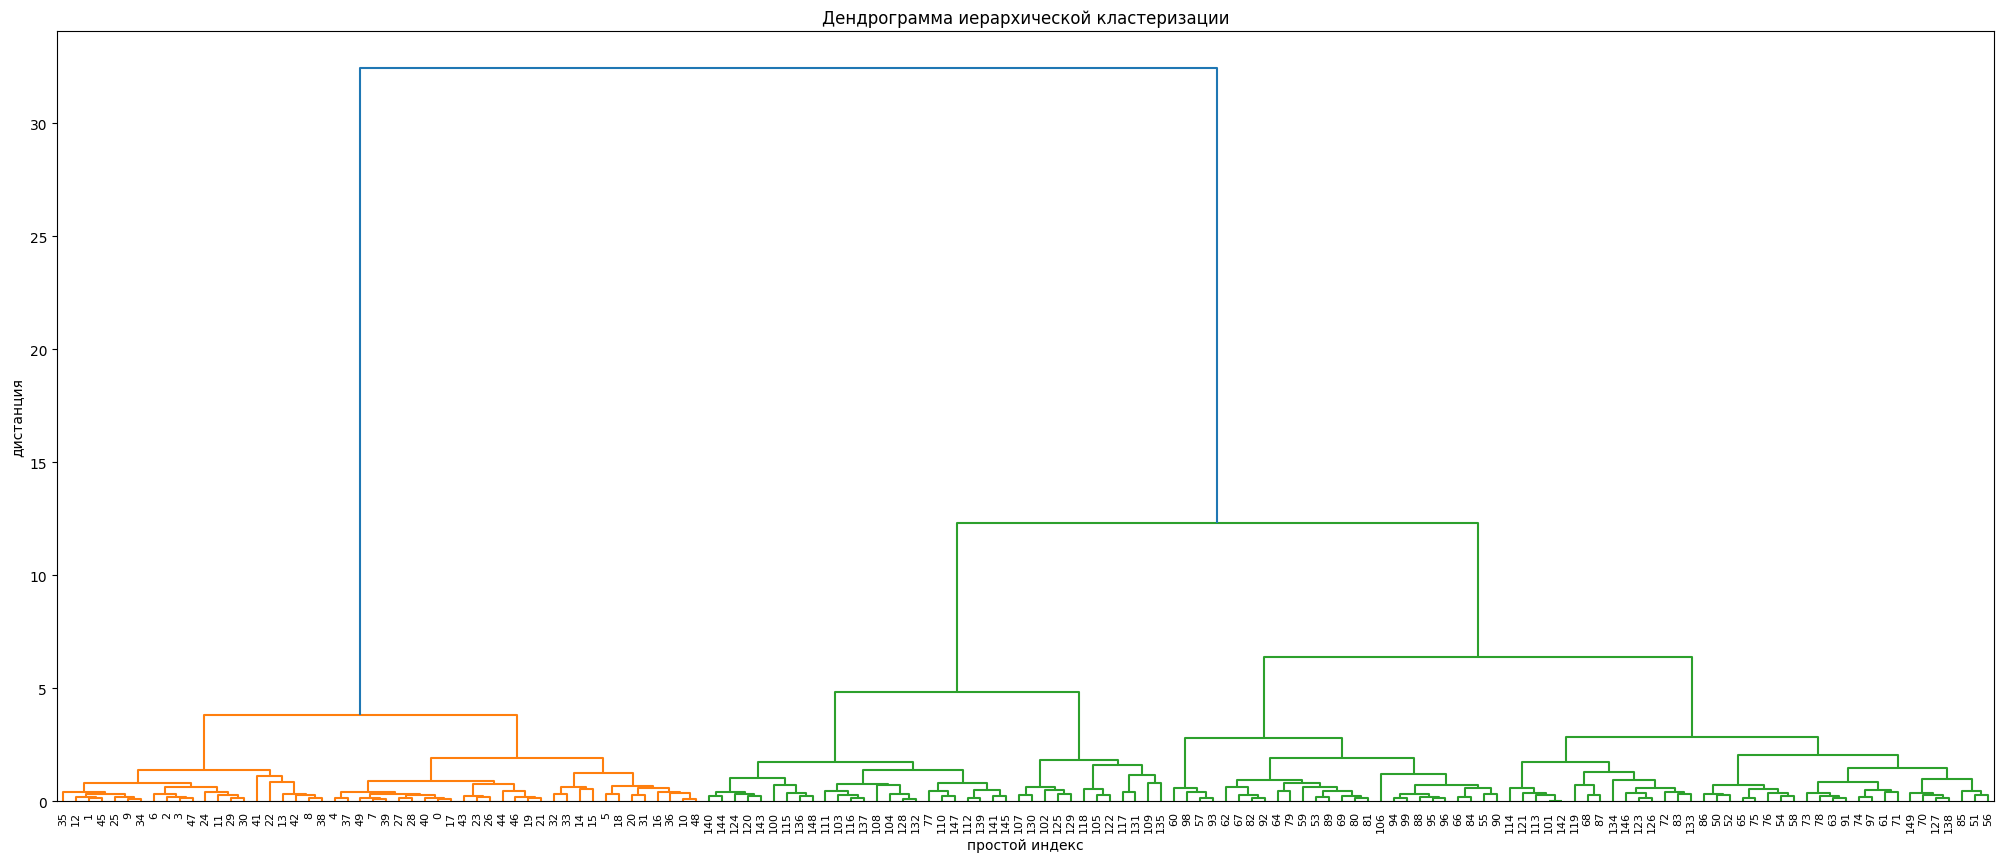

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [13.75, 13.75, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [100.0, 100.0, 133.75, 133.75],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [165.0, 165.0, 190.0, 190.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [255.0, 255.0, 280.0, 280.0],
  [223.75, 223.75, 267.5, 267.5],
  [177.5, 177.5, 245.625, 245.625],
  [116.875, 116.875, 211.5625, 211.5625],
  [36.875, 36.875, 164.21875, 164.21875]],
 'dcoord': [[0.0, 0.8555699854482973, 0.8555699854482973, 0.0],
  [

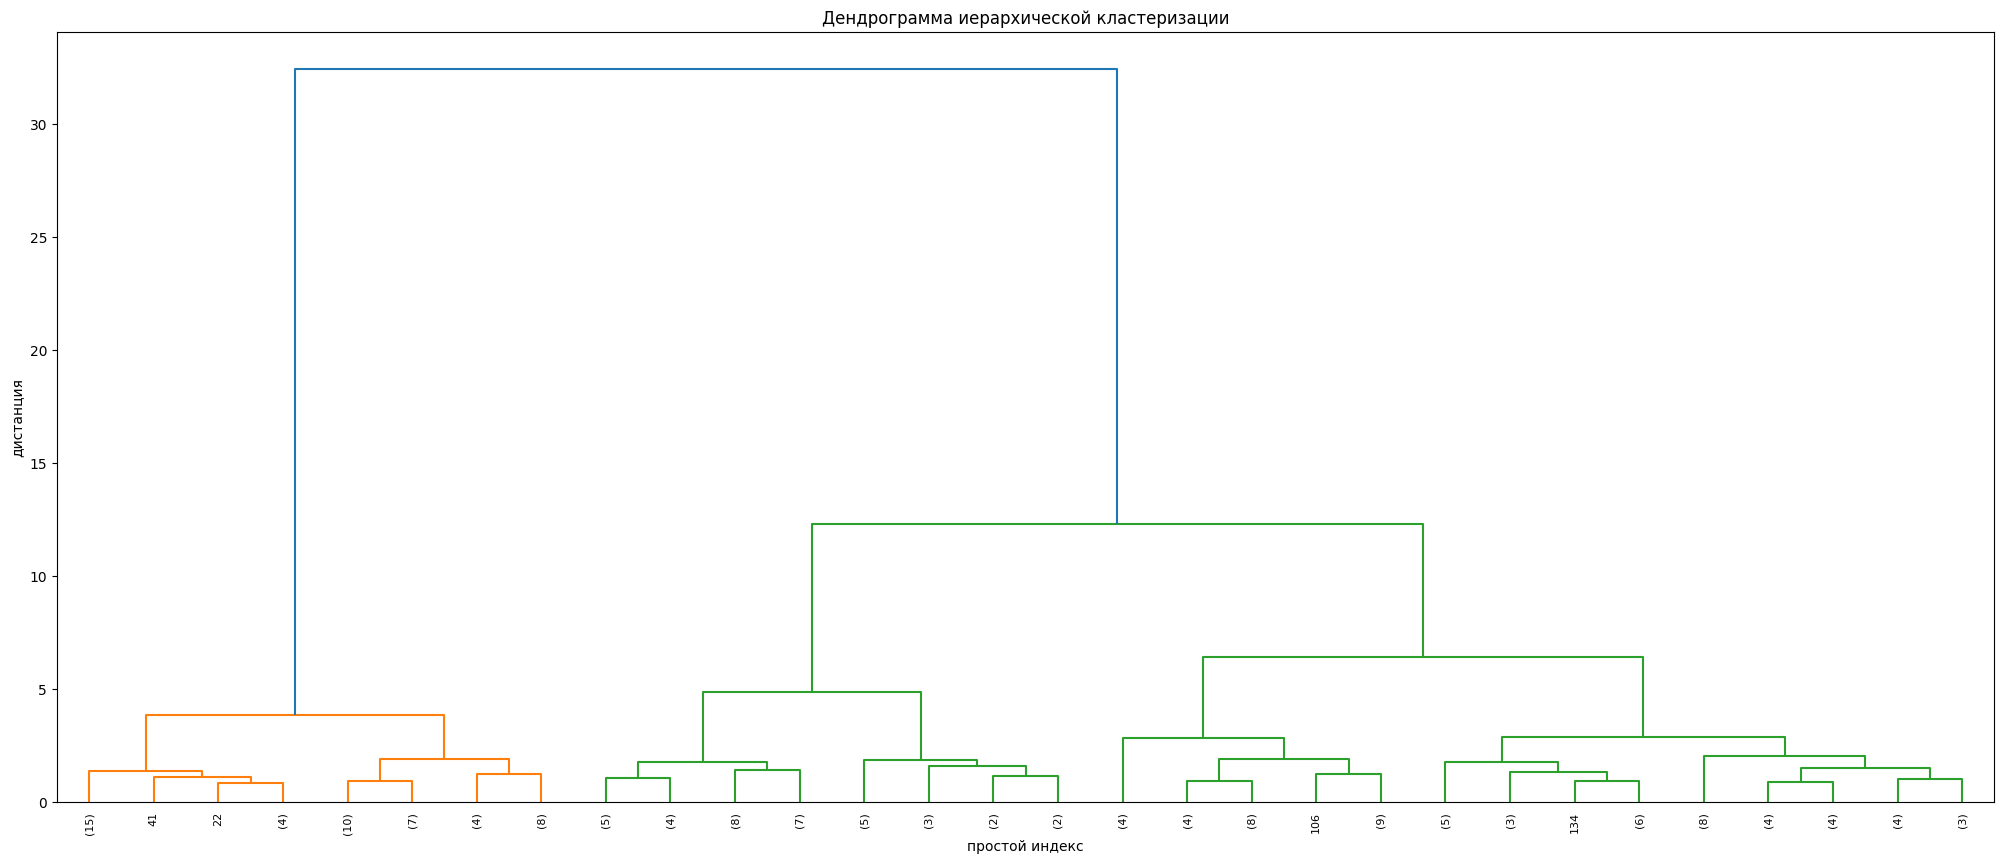

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
plt.title('Датасет iris')
plt.xlabel('Длина Чашели́стика')
plt.ylabel('Ширина Чашели́стика')
plt.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap='rainbow')

Z = linkage(X, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('простой индекс')
plt.ylabel('дистанция')

dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show();

plt.figure(figsize=(25, 10))
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('простой индекс')
plt.ylabel('дистанция')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., truncate_mode='lastp')

### Пример неприменимости Иерархической кластеризации


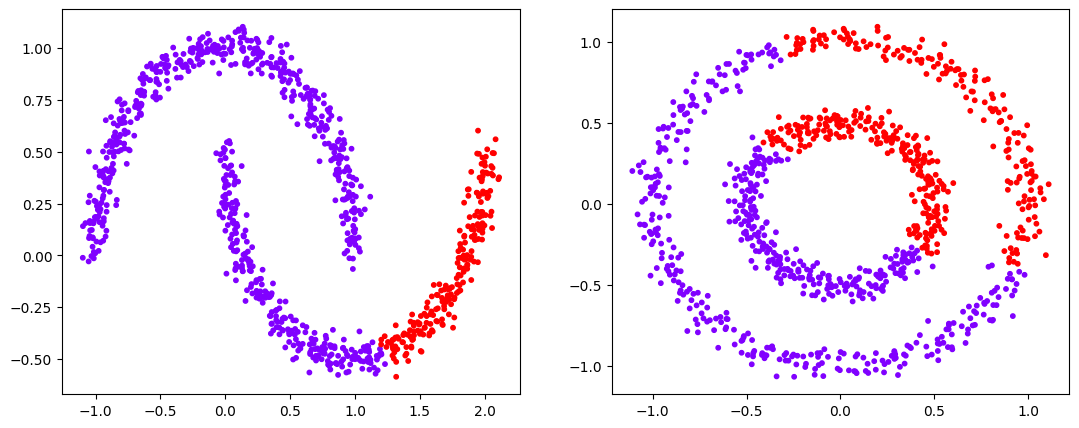

In [16]:
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import AgglomerativeClustering

f, ax = plt.subplots(1, 2, figsize=(13, 5))

X, y = make_moons(1000, noise=.05)
cl = AgglomerativeClustering(n_clusters=2).fit(X)
ax[0].scatter(X[:, 0], X[:, 1], c=cl.labels_, s=10, cmap='rainbow');

X, y = make_circles(1000, factor=.5, noise=.05)
cl = AgglomerativeClustering(n_clusters=2).fit(X)
ax[1].scatter(X[:, 0], X[:, 1], c=cl.labels_, s=10, cmap='rainbow');

### Спектральна кластеризация


c:\git\Витте\dscience\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\git\Витте\dscience\.venv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


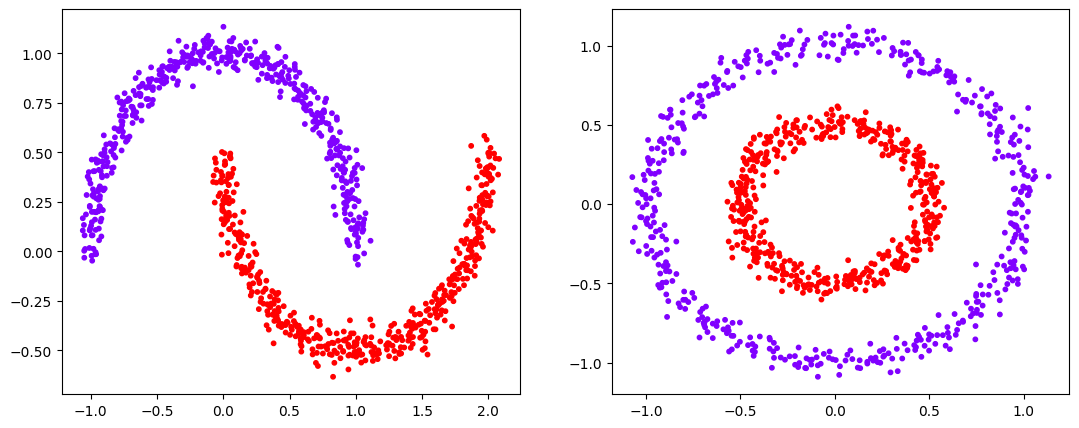

In [19]:
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import SpectralClustering

f, ax = plt.subplots(1, 2, figsize=(13, 5))

X, y = make_moons(1000, noise=.05)
cl = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit(X)
ax[0].scatter(X[:, 0], X[:, 1], c=cl.labels_, s=10, cmap='rainbow');

X, y = make_circles(1000, factor=.5, noise=.05)
cl = SpectralClustering(n_clusters=2, affinity='nearest_neighbors').fit(X)
ax[1].scatter(X[:, 0], X[:, 1], c=cl.labels_, s=10, cmap='rainbow');

### DBSCAN


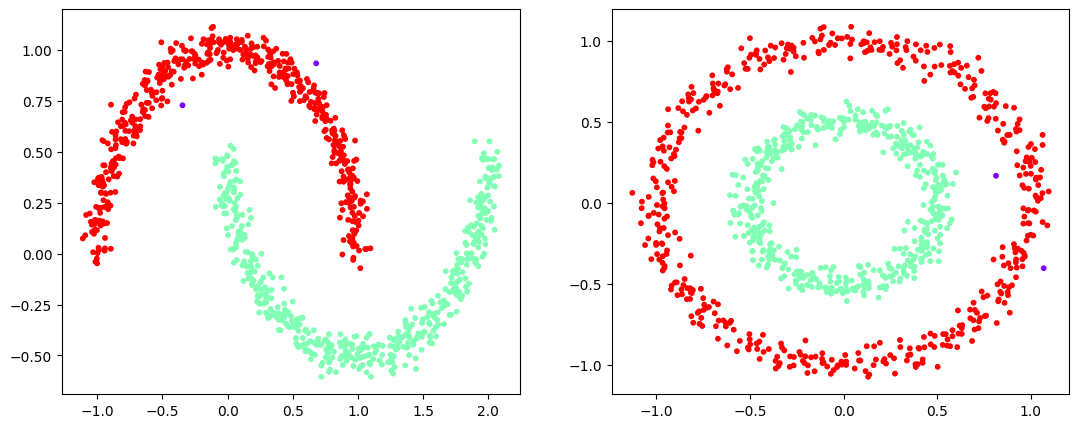

In [23]:
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import DBSCAN

f, ax = plt.subplots(1, 2, figsize=(13, 5))

X, y = make_moons(1000, noise=.05)
cl = DBSCAN(eps=0.1).fit(X)
ax[0].scatter(X[:, 0], X[:, 1], c=cl.labels_, s=10, cmap='rainbow');

X, y = make_circles(1000, factor=.5, noise=.05)
cl = DBSCAN(eps=0.1).fit(X)
ax[1].scatter(X[:, 0], X[:, 1], c=cl.labels_, s=10, cmap='rainbow');

### Сравнительный анализ методов кластеризации


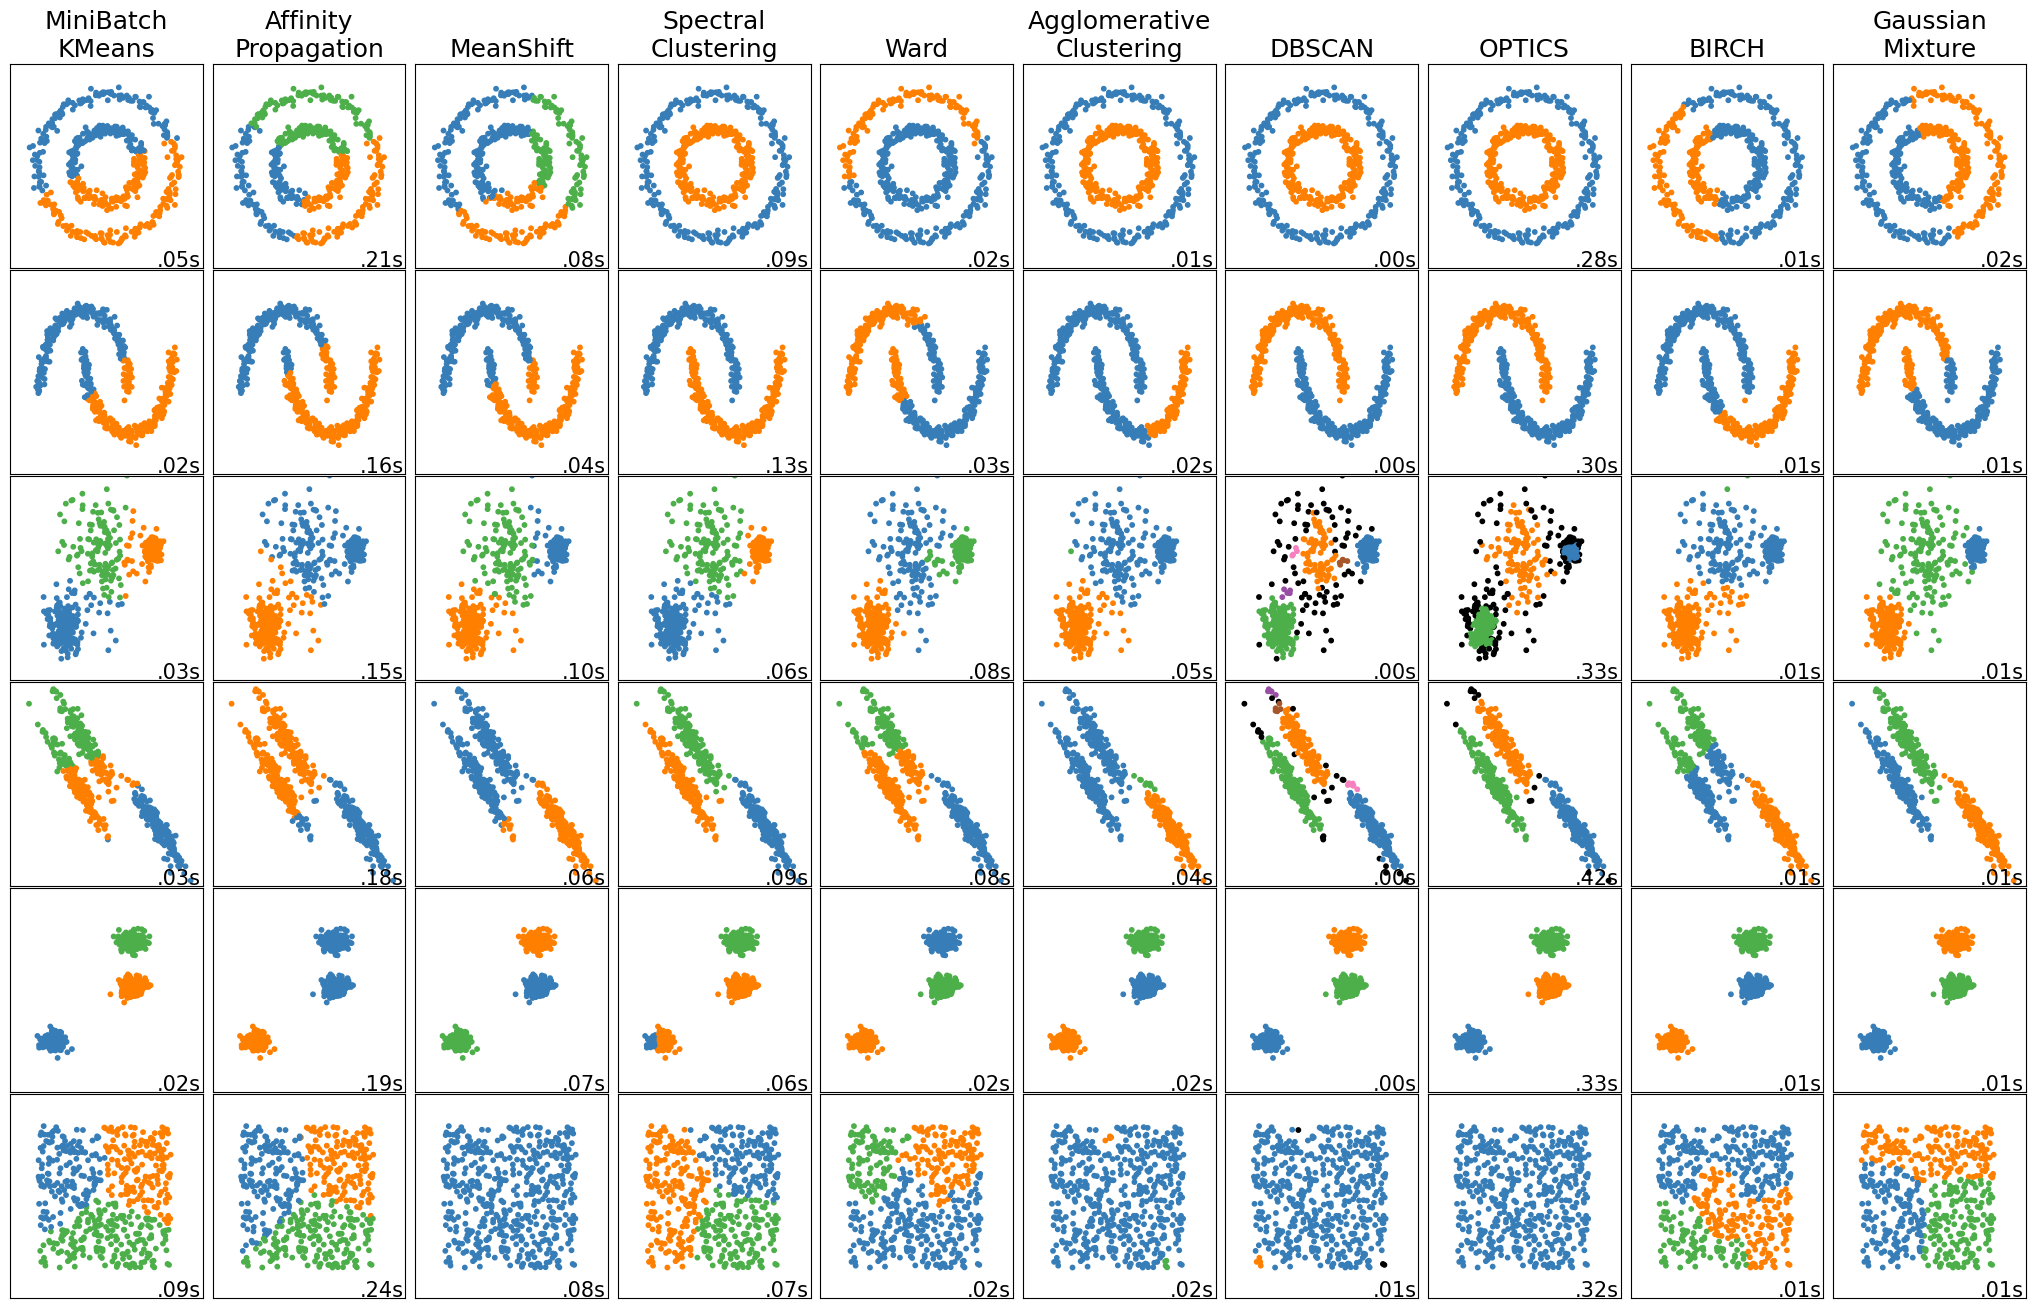

In [24]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Создание наборов данных. Мы выбираем размер достаточно большим, чтобы увидеть масштабируемость
# алгоритмов, но не слишком большое, чтобы избежать слишком долгого времени выполнения
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Анизотропно распределенные данные
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# капли с разной дисперсией
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Настройте параметры кластера
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 3,
    "n_clusters": 3,
    "min_samples": 7,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.08,
        },
    ),
    (
        noisy_moons,
        {
            "damping": 0.75,
            "preference": -220,
            "n_clusters": 2,
            "min_samples": 7,
            "xi": 0.1,
        },
    ),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.01,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 7,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {"min_samples": 7, "xi": 0.1, "min_cluster_size": 0.2}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # обновить параметры со значениями, специфичными для набора данных
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # нормализовать набор данных для облегчения выбора параметров
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # матрица связности для структурированного Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # обеспечить симметричную связность
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Создание кластерных объектов
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"], n_init="auto")
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=params["n_clusters"],
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        metric="cityblock",
        n_clusters=params["n_clusters"],
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=params["n_clusters"])
    gmm = mixture.GaussianMixture(
        n_components=params["n_clusters"], covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # перехватить предупреждения, связанные с kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # добавить черный цвет для выбросов (если есть)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

## Тематическое моделирование


### Предобработка текста


In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Загрузка инструментов NLTK
nltk.download('stopwords')
nltk.download('wordnet')

# Инициализация лемматизатора и стоп-слов
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Преобразование в нижний регистр
    text = text.lower()
    
    # Удаление пунктуации
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Токенизация
    tokens = nltk.word_tokenize(text)
    
    # Удаление стоп-слов и лемматизация
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(tokens)

# Пример использования
sample_text = "NLTK is a leading platform for building Python programs to work with human language data."
processed_text = preprocess_text(sample_text)
print(processed_text)

# Векторизация с использованием TF-IDF
vectorizer = TfidfVectorizer()
corpus = [processed_text]  # Это пример; в реальной ситуации здесь может быть список обработанных документов
X = vectorizer.fit_transform(corpus)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\inimatic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\inimatic\AppData\Roaming\nltk_data...


nltk leading platform building python program work human language data


### Создание рекомендательной системы на основе LDA


#### Тренировка LDA модели

Предполагается, что данные уже предобработаны с использованием вышеуказанного кода, и у нас есть список токенизированных документов texts.


In [9]:
corpus

['nltk leading platform building python program work human language data']

##### Тренировка LDA модели


In [11]:
# Тренировка LDA модели
from gensim import corpora, models
# Создаем словарь и корпус
dictionary = corpora.Dictionary(X)
corpus = [dictionary.doc2bow(text) for text in X]

# Тренируем LDA модель
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

TypeError: decoding to str: need a bytes-like object, csr_matrix found

##### Рекомендация документов для запроса


In [ ]:
def recommend_docs(query, lda_model, corpus, texts, top_n=5):
    query_bow = dictionary.doc2bow(query)
    query_lda = lda_model[query_bow]
    
    # Вычисляем схожесть между запросом и документами
    index = models.MatrixSimilarity(lda_model[corpus])
    sims = index[query_lda]
    
    # Сортируем документы по убыванию схожести
    sorted_docs = sorted(enumerate(sims), key=lambda item: -item[1])
    
    recommended_docs = [texts[i[0]] for i in sorted_docs[:top_n]]
    return recommended_docs

# Пример запроса
query = ["machine", "learning", "algorithm"]
recommended_texts = recommend_docs(query, lda_model, corpus, texts)

for text in recommended_texts:
    print("Recommended text:", text)
